In [1]:
import torchvision
from torchvision.datasets import SVHN
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, Subset
import matplotlib.pyplot as plt
import torch.nn.functional as func
from tqdm.notebook import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
### Smaller version of the dataset from torchvision
# data = SVHN(root='data/', download=True, transform=torchvision.transforms.ToTensor())

In [4]:
### SVHN dataset from https://www.kaggle.com/datasets/stanfordu/street-view-house-numbers/data
# - processed using preprocessing.py (via dump_images_and_labels.sh)

In [6]:
from dataset import StreetNumberDataset
data_test = StreetNumberDataset('svhn_test.h5', Ndigits=2)
data_train = StreetNumberDataset('svhn_train.h5', Ndigits=2)

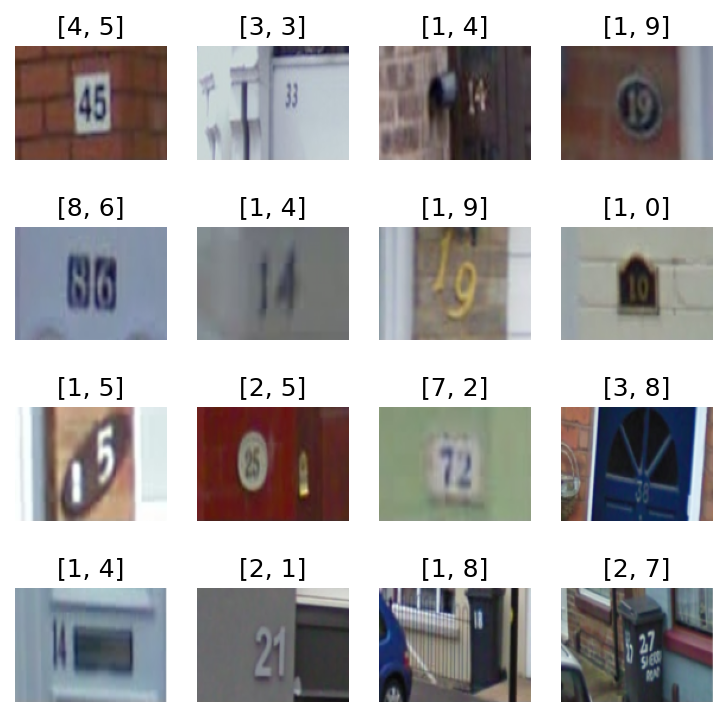

In [10]:
fig, ax = plt.subplots(4,4, figsize=(6,6), dpi=150)

for i in range(16):

    ex_idx = np.random.randint(0, len(data_test))

    img, lab = data_test[ex_idx]

    img *= 255
    ax[i//4][i%4].imshow(img.permute(1,2,0))
    ax[i//4][i%4].axis('off')
    ax[i//4][i%4].set_title(lab.tolist())

In [26]:
# Ntrain = int(len(data)*0.9)
# train_dl = DataLoader(Subset(data,range(Ntrain)), batch_size=256, shuffle=True)
# valid_dl = DataLoader(Subset(data,range(Ntrain,len(data))), batch_size=256, shuffle=False)

train_dl = DataLoader(data_train, batch_size=256, shuffle=True)
valid_dl = DataLoader(data_test, batch_size=256, shuffle=False)

In [32]:
from model import AddressNet

In [33]:
from train import train_valid_loop

## Baseline (no attention)

In [38]:
# net_baseline = AddressNet(Ndigits=1, imshape=(3,32,32), do_attention=False)
net_baseline = AddressNet(Ndigits=2, imshape=(3,96,128), do_attention=False)

In [40]:
loss_dict_baseline = train_valid_loop(net_baseline, train_dl, valid_dl, Nepochs=15, learning_rate=1e-3, output_file='saved_model_baseline.pt')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 0, Train loss (acc): 4.4740206893061245 (0.14829012686155543), Valid loss (acc): 4.2990067799886065 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 1, Train loss (acc): 4.38890780193705 (0.16376172090457805), Valid loss (acc): 4.324233661998402 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 2, Train loss (acc): 4.3892331660633355 (0.16252068394925537), Valid loss (acc): 4.299089475111528 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 3, Train loss (acc): 4.389075574740557 (0.16376172090457805), Valid loss (acc): 4.298304572249904 (0.1904619435136429)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 4, Train loss (acc): 4.387284675114591 (0.16241036955322669), Valid loss (acc): 4.302622318267822 (0.18645284825275252)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 5, Train loss (acc): 4.3870886144503745 (0.16323772752344182), Valid loss (acc): 4.2993583101214785 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 6, Train loss (acc): 4.385237055765072 (0.16503033645890788), Valid loss (acc): 4.297818241697369 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 7, Train loss (acc): 4.38632427134984 (0.16271373414230558), Valid loss (acc): 4.306958400841915 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 8, Train loss (acc): 4.385618666527977 (0.16304467733039163), Valid loss (acc): 4.297236066876036 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 9, Train loss (acc): 4.3855047091631825 (0.16505791505791506), Valid loss (acc): 4.301066687612822 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 10, Train loss (acc): 4.386369705200195 (0.16378929950358523), Valid loss (acc): 4.299564549417207 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 11, Train loss (acc): 4.385256760556933 (0.16367898510755655), Valid loss (acc): 4.300924098852909 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 12, Train loss (acc): 4.384227081083916 (0.16323772752344182), Valid loss (acc): 4.296997720544988 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 13, Train loss (acc): 4.384591861509941 (0.16519580805295092), Valid loss (acc): 4.296539017648408 (0.1904619435136429)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 14, Train loss (acc): 4.3854181934410414 (0.16271373414230558), Valid loss (acc): 4.297783316987934 (0.18393968405935854)


In [41]:
net_baseline.load_state_dict(torch.load('saved_model_baseline.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

## With attention

In [48]:
# net_attention = AddressNet(Ndigits=1, imshape=(3,32,32), do_attention=True)
net_attention = AddressNet(Ndigits=2, imshape=(3,96,128), do_attention=True)

In [49]:
loss_dict_attention = train_valid_loop(net_attention, train_dl, valid_dl, Nepochs=15, learning_rate=1e-3, output_file='saved_model_attention.pt')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 0, Train loss (acc): 4.511933776694284 (0.13836183121897408), Valid loss (acc): 4.338580521670255 (0.18645284825275252)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 1, Train loss (acc): 4.401005113628549 (0.16241036955322669), Valid loss (acc): 4.305059982068611 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 2, Train loss (acc): 4.388830238664654 (0.16271373414230558), Valid loss (acc): 4.301940354433927 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 3, Train loss (acc): 4.387272458680918 (0.1628792057363486), Valid loss (acc): 4.301306016517408 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 4, Train loss (acc): 4.385940189092931 (0.16257584114726972), Valid loss (acc): 4.300951538663922 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 5, Train loss (acc): 4.385942714315065 (0.16318257032542746), Valid loss (acc): 4.29550704089078 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 6, Train loss (acc): 4.385345841797305 (0.16315499172642028), Valid loss (acc): 4.298872152964274 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 7, Train loss (acc): 4.385040108586701 (0.1649200220628792), Valid loss (acc): 4.299117565155029 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 8, Train loss (acc): 4.385288607906288 (0.16447876447876447), Valid loss (acc): 4.298337531812264 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 9, Train loss (acc): 4.384682097905118 (0.16365140650854937), Valid loss (acc): 4.313506054155754 (0.1904619435136429)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 10, Train loss (acc): 4.38450414362088 (0.16332046332046332), Valid loss (acc): 4.30178385069876 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 11, Train loss (acc): 4.384758190369942 (0.16348593491450633), Valid loss (acc): 4.297978328936027 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 12, Train loss (acc): 4.384897003711109 (0.16265857694429123), Valid loss (acc): 4.299591165600401 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 13, Train loss (acc): 4.383895410618312 (0.16301709873138445), Valid loss (acc): 4.301861069419167 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 14, Train loss (acc): 4.38510019678465 (0.163596249310535), Valid loss (acc): 4.300057122201631 (0.18393968405935854)


In [50]:
net_attention.load_state_dict(torch.load('saved_model_attention.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

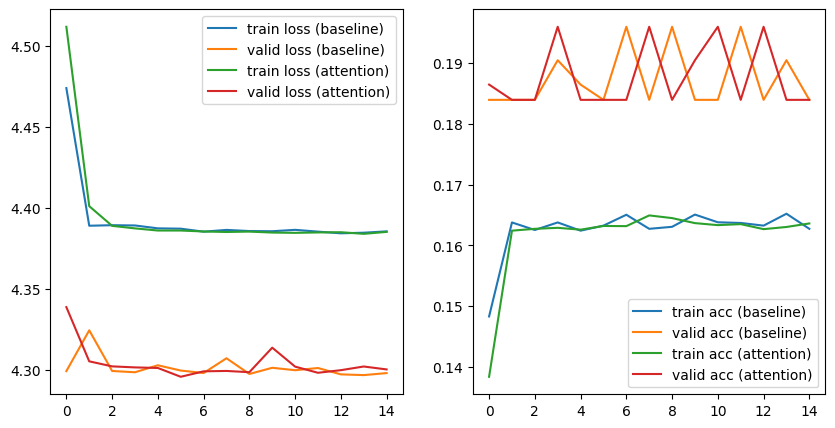

In [51]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(range(len(loss_dict_baseline['train_loss'])),loss_dict_baseline['train_loss'],label='train loss (baseline)')
axes[0].plot(range(len(loss_dict_baseline['valid_loss'])),loss_dict_baseline['valid_loss'],label='valid loss (baseline)')
axes[1].plot(range(len(loss_dict_baseline['train_acc'])),loss_dict_baseline['train_acc'],label='train acc (baseline)')
axes[1].plot(range(len(loss_dict_baseline['valid_acc'])),loss_dict_baseline['valid_acc'],label='valid acc (baseline)')
axes[0].plot(range(len(loss_dict_attention['train_loss'])),loss_dict_attention['train_loss'],label='train loss (attention)')
axes[0].plot(range(len(loss_dict_attention['valid_loss'])),loss_dict_attention['valid_loss'],label='valid loss (attention)')
axes[1].plot(range(len(loss_dict_attention['train_acc'])),loss_dict_attention['train_acc'],label='train acc (attention)')
axes[1].plot(range(len(loss_dict_attention['valid_acc'])),loss_dict_attention['valid_acc'],label='valid acc (attention)')
#axes.set_yscale('log')
#axes.set_ylim([1e-2,1e0])
axes[0].legend()
axes[1].legend()
plt.show()

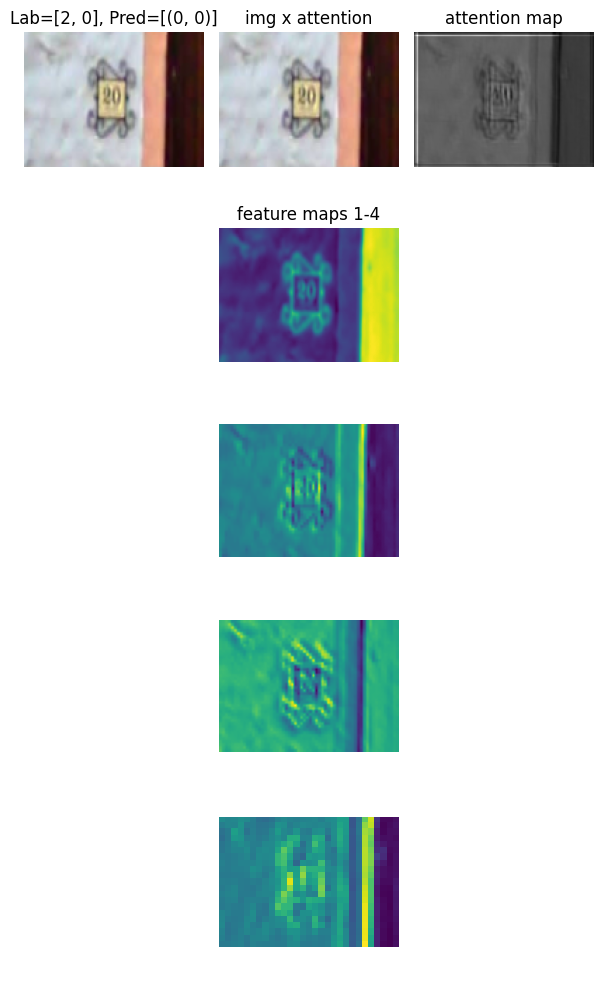

In [69]:
do_attention = True
if do_attention:
    net = net_attention
else:
    net = net_baseline

ex = np.random.randint(len(data))
ex,lab = data[ex]
ex = ex.unsqueeze(0)

pred = net(ex).detach()

if do_attention:
    ex0 = ex.clone()
    ex = net.SpatialGate(ex).detach()
    scale = ex/ex0

feats1  = net.f1(ex).detach()
feats2  = net.f2(feats1).detach()
feats3  = net.f3(feats2).detach()
feats4  = net.f4(feats3).detach()

if net.Ndigits > 1:
    pred_dig0 = torch.argmax(pred[0,0]).squeeze(0)
    pred_dig1 = torch.argmax(pred[0,1]).squeeze(0)
    pred_dig = [pred_dig0,pred_dig1]
else:
    pred_dig = torch.argmax(pred[0]).squeeze(0)

fig, axes = plt.subplots(5,3,figsize=(6,10))

if do_attention:

    renormalize = lambda x: (x-x.min())/(x.max()-x.min())

    axes[0,0].imshow(renormalize(ex0.squeeze(0).permute(1,2,0)))
    axes[0,1].imshow(renormalize(ex.squeeze(0).permute(1,2,0)))
    axes[0,1].set_title('img x attention')
    axes[0,2].imshow(renormalize(scale.squeeze(0).permute(1,2,0)))
    axes[0,2].set_title('attention map')
else:
    axes[0,0].imshow(ex.squeeze(0).permute(1,2,0))


### Feature maps
axes[1,1].imshow(torch.sum(feats1.squeeze(0).permute(1,2,0),dim=-1))
axes[2,1].imshow(torch.sum(feats2.squeeze(0).permute(1,2,0),dim=-1))
axes[3,1].imshow(torch.sum(feats3.squeeze(0).permute(1,2,0),dim=-1))
axes[4,1].imshow(torch.sum(feats4.squeeze(0).permute(1,2,0),dim=-1))

axes[0,0].set_title(f'Lab={lab.tolist()}, Pred=[{pred_dig[0].item(),pred_dig[1].item()}]')
axes[1,1].set_title('feature maps 1-4')

for ax in axes.flatten():
    ax.axis('off')

fig.tight_layout()
